In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.callbacks import EarlyStopping
import keras.backend as K

In [3]:
base_dir = r'C:\Users\firoj\OneDrive\Desktop\thesis_test\Thesis_test_01\Feature_matrix\AIS\\'
os.chdir(base_dir)

In [4]:
# Load the datasets
X_train = np.load(base_dir + 'X_train.npy')
X_val = np.load(base_dir + 'X_val.npy')
X_test = np.load(base_dir + 'X_test.npy')

y_train = np.load(base_dir + 'y_train.npy')
y_val = np.load(base_dir + 'y_val.npy')
y_test = np.load(base_dir + 'y_test.npy')

In [5]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (34654, 6)


In [6]:
# Define RMSE as a custom metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [7]:
# Model architecture for MLP with 1 hidden layer and L1 Regularization
model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

In [8]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.006793806619350815), 
              loss='mean_squared_error', 
              metrics=['mse', rmse, 'mae', 'mape'])

In [9]:
# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                350       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/100
1083/1083 [==============================] - 2s 1ms/step - loss: 151103.9375 - mse: 151100.6719 - rmse: 377.2818 - mae: 249.2478 - mape: 3964694272.0000 - val_loss: 119754.9688 - val_mse: 119751.0312 - val_rmse: 339.1148 - val_mae: 233.5943 - val_mape: 4489423872.0000
Epoch 2/100
1083/1083 [==============================] - 1s 1ms/step - loss: 121794.4766 - mse: 121790.2891 - rmse: 342.6613 - mae: 232.0469 - mape: 4098554624.0000 - val_loss: 117052.8750 - val_mse: 117048.3438 - val_rmse: 335.4301 - val_mae: 227.3808 - val_mape: 4110700288.0000
Epoch 3/100
1083/1083 [==============================] - 1s 1ms/step - loss: 120006.4141 - mse: 120001.5469 - rmse: 340.3853 - mae: 225.8483 - mape: 3794874112.0000 - val_loss: 115771.8906 - val_mse: 115767.1328 - val_rmse: 333.3438 - val_mae: 220.8430 - val_mape: 3624820992.0000
Epoch 4/100
1083/1083 [==============================] - 1s 1ms/step - loss: 118625.2266 - mse: 118620.2109 - rmse: 338.3971 - mae: 223.2555 - mape: 37018718

1083/1083 [==============================] - 2s 1ms/step - loss: 109734.4922 - mse: 109728.1719 - rmse: 325.6686 - mae: 213.2527 - mape: 3516070144.0000 - val_loss: 104207.6797 - val_mse: 104201.1875 - val_rmse: 316.3783 - val_mae: 206.5936 - val_mape: 3624919808.0000
Epoch 31/100
1083/1083 [==============================] - 1s 1ms/step - loss: 109985.1016 - mse: 109978.6562 - rmse: 326.0865 - mae: 213.2855 - mape: 3510689280.0000 - val_loss: 103935.9375 - val_mse: 103929.5391 - val_rmse: 315.9856 - val_mae: 206.7552 - val_mape: 3603544576.0000
Epoch 32/100
1083/1083 [==============================] - 2s 1ms/step - loss: 109720.1797 - mse: 109713.6875 - rmse: 325.5031 - mae: 212.6515 - mape: 3569930496.0000 - val_loss: 104185.6250 - val_mse: 104179.1406 - val_rmse: 316.1845 - val_mae: 205.7410 - val_mape: 3620995072.0000
Epoch 33/100
1083/1083 [==============================] - 2s 2ms/step - loss: 109951.5703 - mse: 109945.0547 - rmse: 325.4793 - mae: 213.4240 - mape: 3617894656.0000 -

1083/1083 [==============================] - 2s 1ms/step - loss: 108105.5156 - mse: 108098.5781 - rmse: 323.3916 - mae: 210.3189 - mape: 3478204416.0000 - val_loss: 102016.1484 - val_mse: 102009.1172 - val_rmse: 312.7217 - val_mae: 202.1663 - val_mape: 3461250816.0000
Epoch 60/100
1083/1083 [==============================] - 2s 1ms/step - loss: 108457.3281 - mse: 108450.2578 - rmse: 323.8922 - mae: 210.5390 - mape: 3466216192.0000 - val_loss: 101537.7188 - val_mse: 101530.6406 - val_rmse: 312.1816 - val_mae: 202.8110 - val_mape: 3484937472.0000
Epoch 61/100
1083/1083 [==============================] - 1s 1ms/step - loss: 107519.2500 - mse: 107512.1250 - rmse: 321.9035 - mae: 210.0896 - mape: 3491078144.0000 - val_loss: 101462.6328 - val_mse: 101455.4219 - val_rmse: 312.0233 - val_mae: 202.9706 - val_mape: 3471100928.0000
Epoch 62/100
1083/1083 [==============================] - 2s 1ms/step - loss: 107575.6406 - mse: 107568.5625 - rmse: 322.2433 - mae: 209.8193 - mape: 3396608512.0000 -

1083/1083 [==============================] - 1s 1ms/step - loss: 107639.9453 - mse: 107632.4844 - rmse: 322.7032 - mae: 208.6238 - mape: 3592709632.0000 - val_loss: 100598.4844 - val_mse: 100591.0547 - val_rmse: 310.7306 - val_mae: 202.6797 - val_mape: 3610323712.0000
Epoch 89/100
1083/1083 [==============================] - 1s 1ms/step - loss: 106964.7656 - mse: 106957.3906 - rmse: 321.3812 - mae: 208.5294 - mape: 3529460992.0000 - val_loss: 100955.4531 - val_mse: 100948.0391 - val_rmse: 311.0954 - val_mae: 200.6638 - val_mape: 3458459136.0000
Epoch 90/100
1083/1083 [==============================] - 1s 1ms/step - loss: 107206.1484 - mse: 107198.6953 - rmse: 321.7019 - mae: 207.9848 - mape: 3547064320.0000 - val_loss: 100479.3203 - val_mse: 100471.8359 - val_rmse: 310.5475 - val_mae: 201.5633 - val_mape: 3535354112.0000
Epoch 91/100
1083/1083 [==============================] - 1s 1ms/step - loss: 107443.8750 - mse: 107436.4141 - rmse: 321.8864 - mae: 208.2748 - mape: 3498497536.0000 -

In [12]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

233/233 [==============================] - 0s 891us/step - loss: 97989.7188 - mse: 97982.2734 - rmse: 307.1069 - mae: 198.8057 - mape: 3281299712.0000
Test Loss: [97989.71875, 97982.2734375, 307.10687255859375, 198.80569458007812, 3281299712.0]


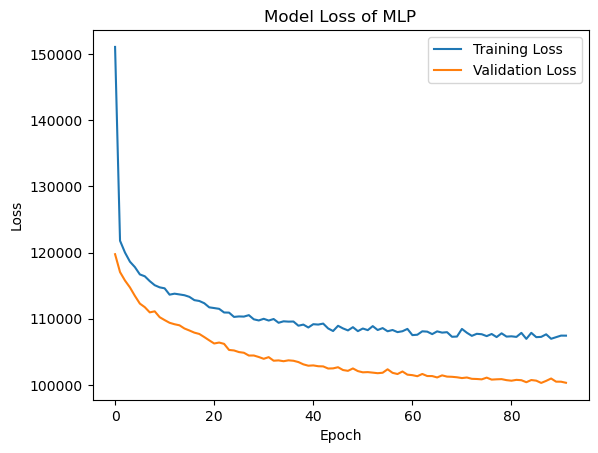

In [13]:
# Assuming history is the output of the model.fit() method
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss of MLP')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [14]:
y_pred = model.predict(X_test).flatten()  # Flatten predictions to ensure it's a 1D array
y_test_flattened = y_test.flatten()  # Flatten actual values for consistency

233/233 [==============================] - 0s 747us/step


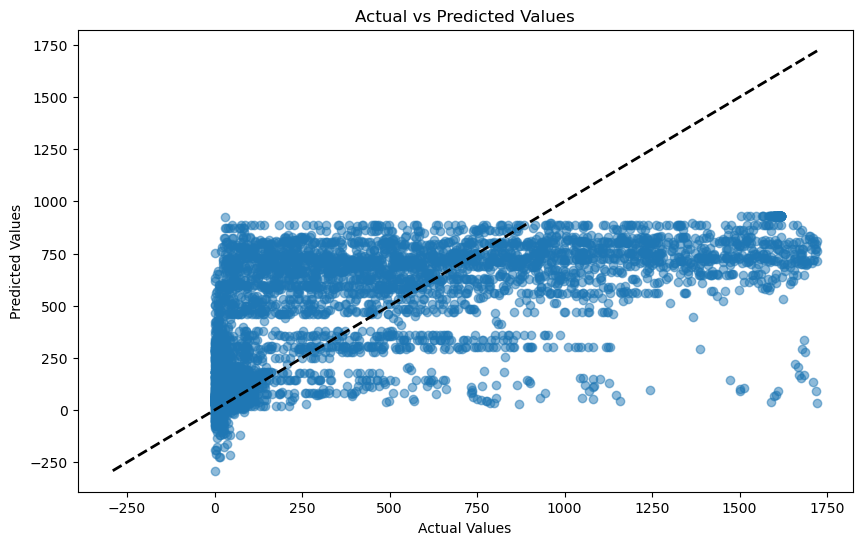

In [15]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flattened, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot a line of perfect predictions for reference
max_val = max(y_test_flattened.max(), y_pred.max())
min_val = min(y_test_flattened.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)  # Black dashed line for perfect predictions

plt.show()

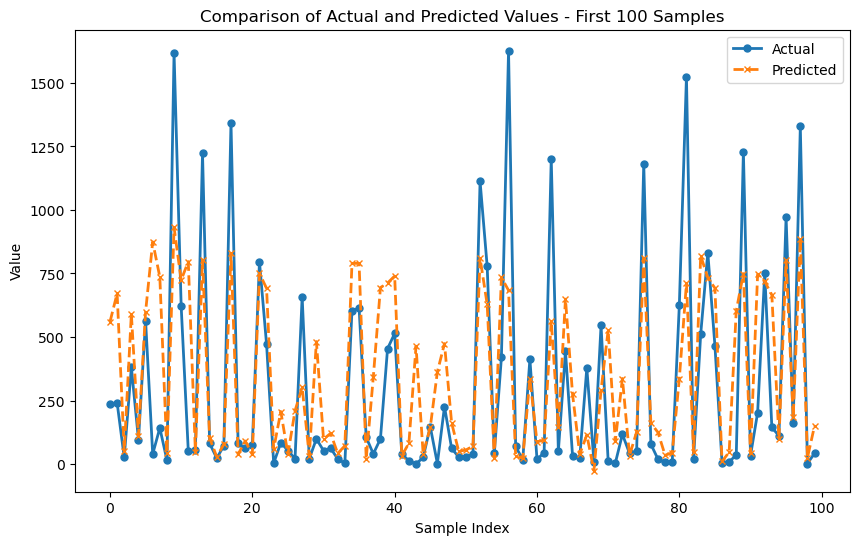

In [16]:
# Plotting a line plot for a clearer comparison for a subset
plt.figure(figsize=(10, 6))
plt.plot(y_test_flattened[:100], marker='o', label='Actual', linewidth=2, markersize=5)
plt.plot(y_pred[:100], marker='x', linestyle='--', label='Predicted', linewidth=2, markersize=5)
plt.title('Comparison of Actual and Predicted Values - First 100 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

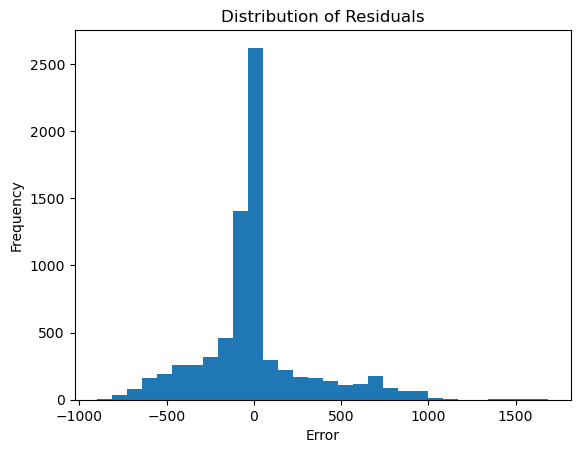

In [17]:
# Calculating residuals
residuals = y_test - y_pred.squeeze()  # Adjust dimensions if necessary

# Plotting the histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [18]:
# Evaluate the model
loss, mse, rmse, mae, mape = model.evaluate(X_test, y_test)
print("Test loss (MSE):", loss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

233/233 [==============================] - 0s 950us/step - loss: 97989.7188 - mse: 97982.2734 - rmse: 307.1069 - mae: 198.8057 - mape: 3281299712.0000
Test loss (MSE): 97989.71875
Mean Squared Error (MSE): 97982.2734375
Root Mean Squared Error (RMSE): 307.10687255859375
Mean Absolute Error (MAE): 198.80569458007812
Mean Absolute Percentage Error (MAPE): 3281299712.0
